### **HEART ATTACK ANALYSIS AND PREDICTION** 

## Python Libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Data Content
* **Age**: Age of the patient
* **Sex**: Sex of the patient
* **cp**: Chest Pain type chest pain type
 * Value 1: typical angina
 * Value 2: atypical angina
 * Value 3: non-anginal pain
 * Value 4: asymptomatic
* **trtbps**: resting blood pressure (in mm Hg)
* **chol**: cholestoral in mg/dl fetched via BMI sensor
* **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **rest_ecg**: resting electrocardiographic results
 * Value 0: normal
 * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 * Value 2: showing probable or definite left * * * ventricular hypertrophy by Estes' criteria
* **thalachh**: maximum heart rate achieved
* **oldpeak** : previous peak
* **slp** : slope
* **caa** : number of major vessels (0-3)
* **thall** : thalium stress test result ~ (0,3)
* **exng** : exercise induced angina ~ 1 = Yes, 0 = No
* **target(output)**: 0= less chance of heart attack 1= more chance of heart attack

### Read and Analyse Data
* We read heart.csv 

In [2]:
# read data
df = pd.read_csv("heart.csv")

In [3]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# shape of data
print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (303, 14)


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
# checking the number of unique values in each column

df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [7]:
# checking distribution of target(output) variable

df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

In [8]:
# separating the columns in categorical and continuous

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [9]:
# summary of columns

df[con_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
# to check missing values

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Exploratory Data Analysis


#### Univariate Analysis
##### Count plot of categorical features

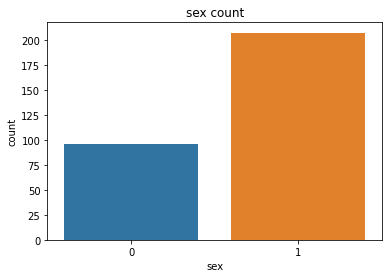

0 = Females  1 = Male


In [11]:
sns.countplot(df['sex'])
plt.title('sex count')
plt.show()
print('0 = Females  1 = Male')

Text(0.5, 1.0, 'count of chest`s pain')

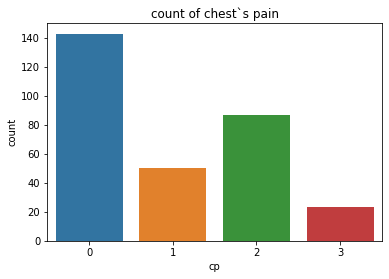

In [12]:
sns.countplot(df['cp'])
plt.title('count of chest`s pain')

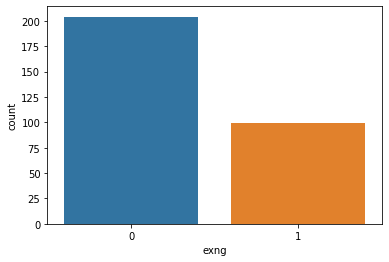

In [13]:
sns.countplot(df['exng'])

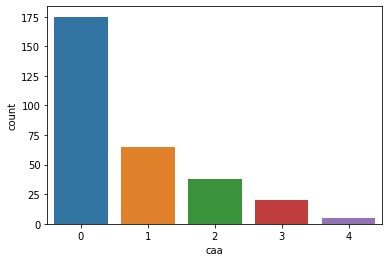

In [14]:
sns.countplot(df['caa'])

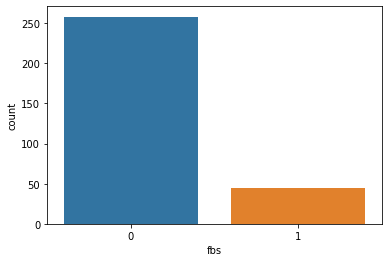

In [15]:
sns.countplot(df['fbs'])

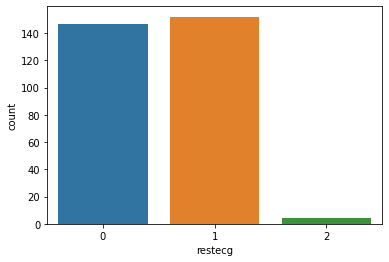

In [16]:
sns.countplot(df['restecg'])

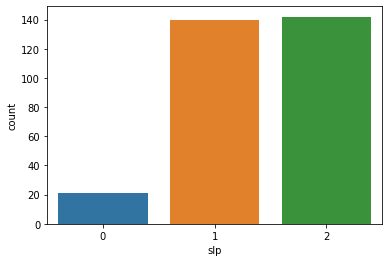

In [17]:
sns.countplot(df['slp'])

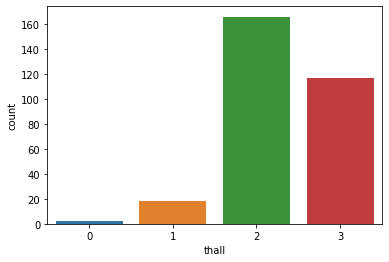

In [18]:
sns.countplot(df['thall'])

##### Boxen plot of continuous features

Text(0.5, 1.0, 'Age')

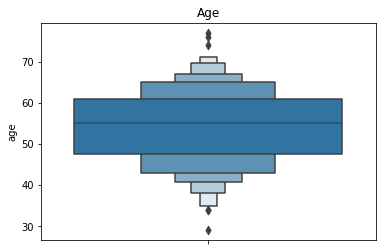

In [19]:
sns.boxenplot(data=df,y ='age')
plt.title("Age")

Text(0.5, 1.0, 'Resting Blood Pressure (in mm Hg)')

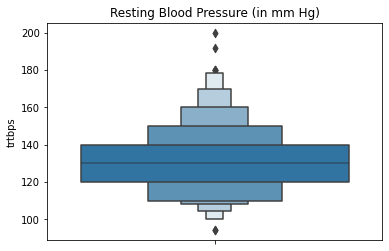

In [20]:
sns.boxenplot(data=df,y ='trtbps')
plt.title("Resting Blood Pressure (in mm Hg)")

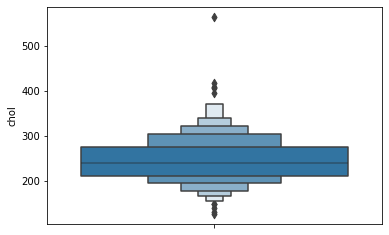

In [21]:
sns.boxenplot(data=df,y ='chol')

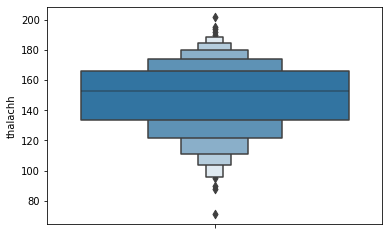

In [22]:
sns.boxenplot(data=df,y ='thalachh')

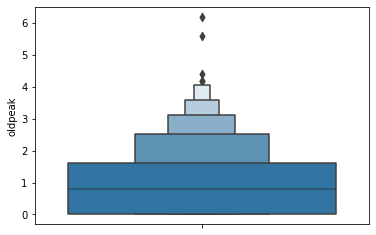

In [23]:
sns.boxenplot(data=df,y ='oldpeak')

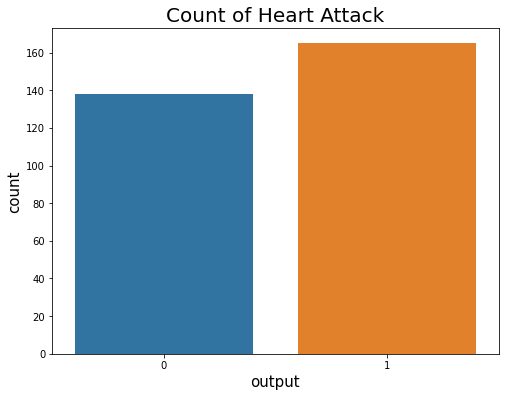

In [24]:
# Count plot of target

plt.figure(figsize=(8,6))
plt.title('Count of Output')
plt.title('Count of Heart Attack', fontsize=20)
plt.xlabel('Output', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
sns.countplot(df['output'])

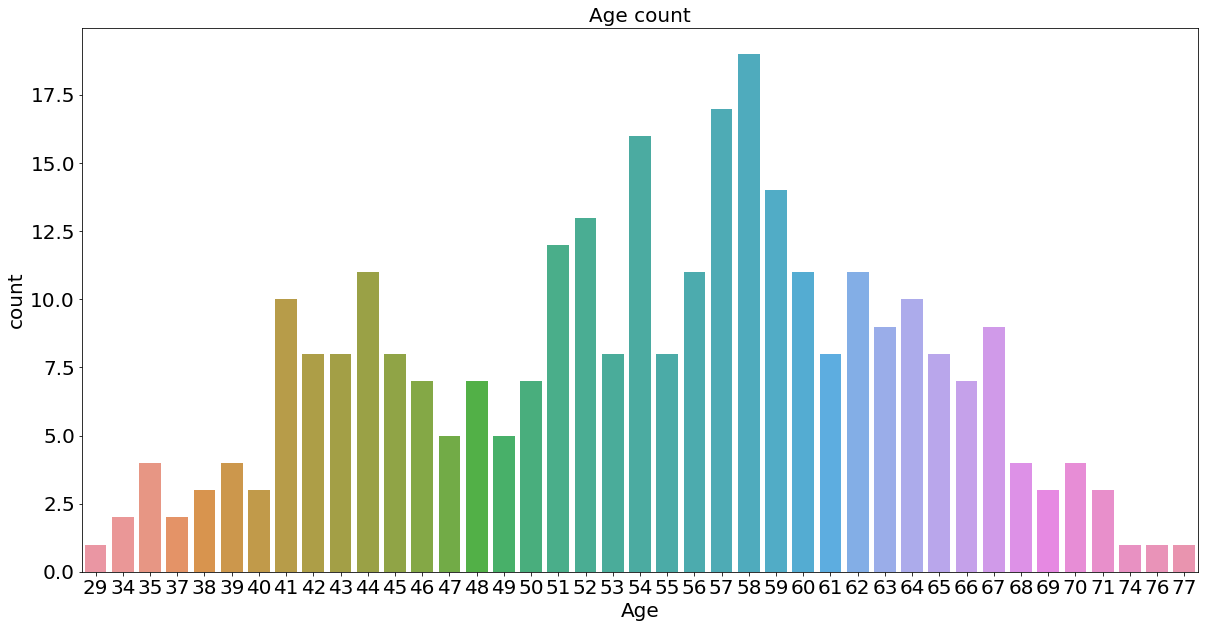

In [25]:
# count plot of age

plt.figure(figsize=(20, 10))
sns.countplot(df['age'])
plt.title('Age count',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

#### Bivariate Analysis
##### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

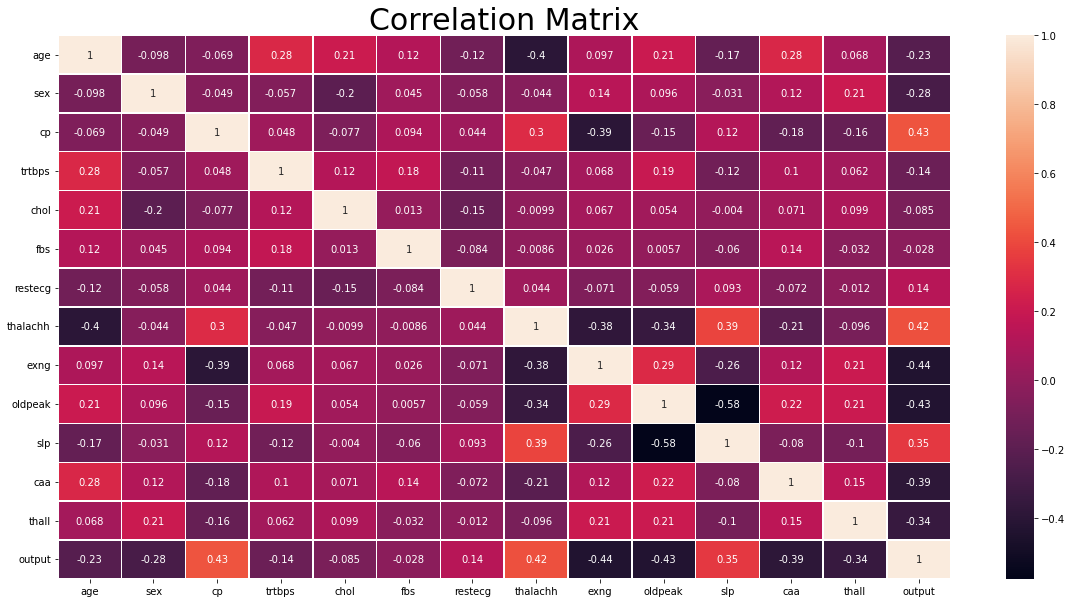

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True,cmap='rocket', linewidths ='.5')
plt.title('Correlation Matrix', fontsize = 30)

Text(0.5, 1.0, 'Correlation Matrix of continuous variable')

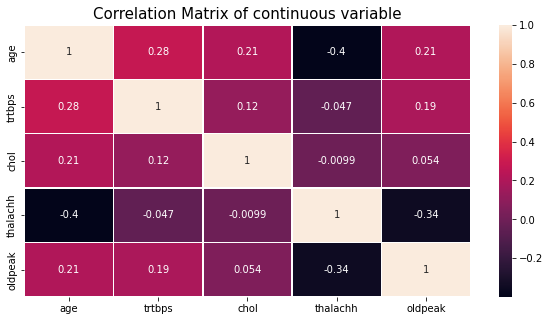

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df[con_cols].corr(), annot=True, linewidths= '.5')
plt.title('Correlation Matrix of continuous variable', fontsize=15)

##### Distribution of continuous features according to target variable

Text(0.5, 1.0, 'Distribution of age\naccording to\n target variable\n')

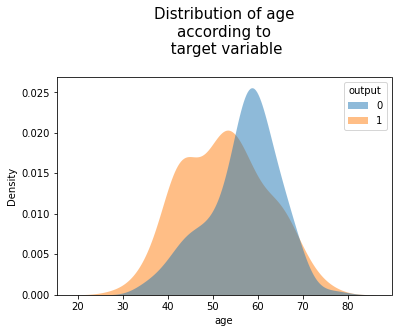

In [28]:
sns.kdeplot(data=df, x='age', hue='output', fill=True, alpha = .5, linewidth= 0)
plt.title("Distribution of age\naccording to\n target variable\n", fontsize = 15)

Text(0.5, 1.0, 'Distribution of trtbps\naccording to\n target variable\n')

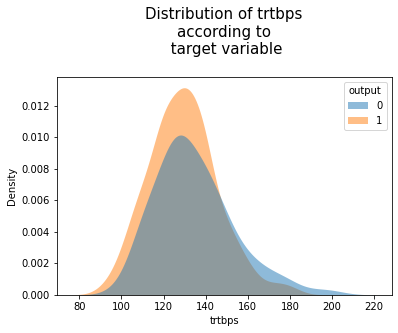

In [29]:
sns.kdeplot(data=df, x='trtbps', hue='output', fill=True, alpha = .5, linewidth= 0)
plt.title("Distribution of trtbps\naccording to\n target variable\n", fontsize = 15)

Text(0.5, 1.0, 'Distribution of chol\naccording to\n target variable\n')

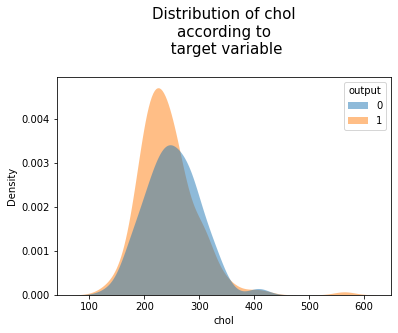

In [30]:
sns.kdeplot(data=df, x='chol', hue='output', fill=True, alpha = .5, linewidth= 0)
plt.title("Distribution of chol\naccording to\n target variable\n", fontsize = 15)

Text(0.5, 1.0, 'Distribution of thalachh\naccording to\n target variable\n')

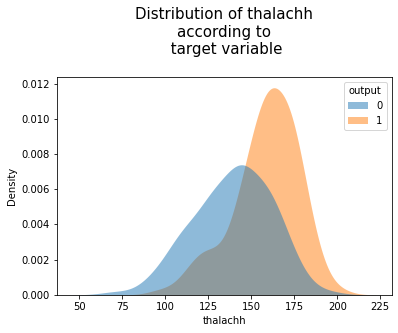

In [31]:
sns.kdeplot(data=df, x='thalachh', hue='output', fill=True, alpha = .5, linewidth= 0)
plt.title("Distribution of thalachh\naccording to\n target variable\n", fontsize = 15)

Text(0.5, 1.0, 'Distribution of oldpeak\naccording to\n target variable\n')

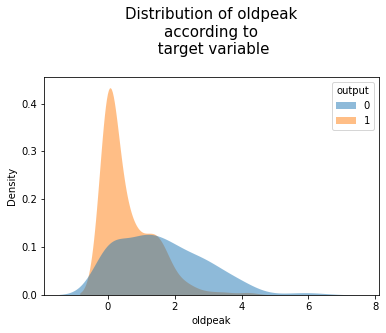

In [32]:
sns.kdeplot(data=df, x='oldpeak', hue='output', fill=True, alpha = .5, linewidth= 0)
plt.title("Distribution of oldpeak\naccording to\n target variable\n", fontsize = 15)

##### Some other relations that seemed intuitive

Text(5, 0.2, '0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic')

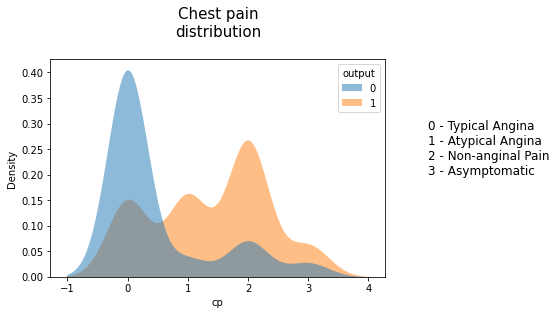

In [33]:
sns.kdeplot(data=df, x='cp',hue="output", fill=True, alpha=.5, linewidth=0)
plt.title("Chest pain\ndistribution\n",fontsize=15)
plt.text(5,0.2,s="0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic", fontsize = 12)

Text(6, 0.3, '0 vessels\n1 vessel\n2 vessels\n3 vessels\n4 vessels')

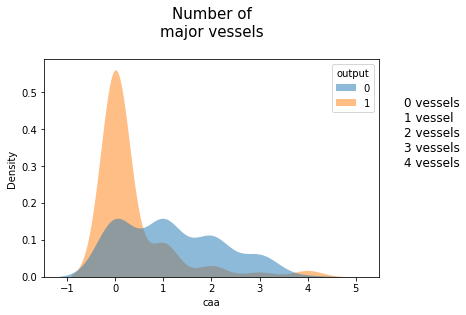

In [34]:
sns.kdeplot(data=df, x='caa',hue="output", fill=True, alpha=.5, linewidth=0)
plt.title("Number of\nmajor vessels\n",fontsize=15)
plt.text(6,0.3,s="0 vessels\n1 vessel\n2 vessels\n3 vessels\n4 vessels", fontsize = 12)

Text(2, 100, '0 - Female\n1 - Male')

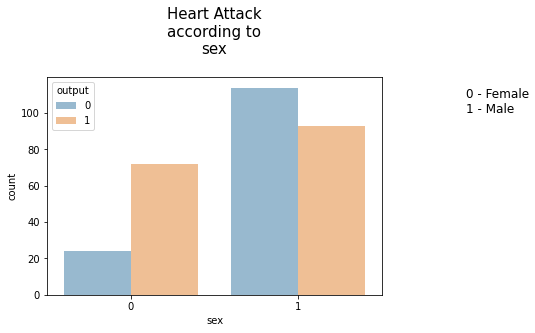

In [35]:
sns.countplot(data=df, x='sex',hue="output", fill=True, alpha=.5, linewidth=0)
plt.title("Heart Attack\naccording to\nsex\n",fontsize=15)
plt.text(2,100,s="0 - Female\n1 - Male", fontsize = 12)

Text(5, 0.3, 'Thalium Stress\nTest Result\n0, 1, 2, 3')

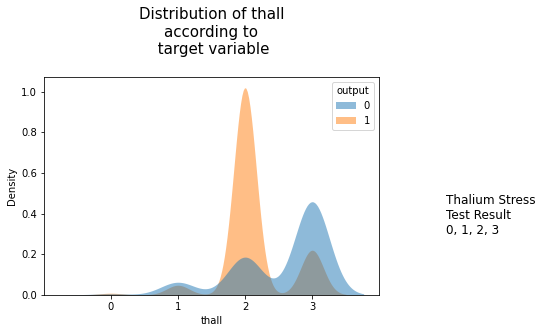

In [36]:
sns.kdeplot(data=df, x='thall',hue="output", fill=True, alpha=.5, linewidth=0)
plt.title("Distribution of thall\naccording to\n target variable\n",fontsize=15)
plt.text(5,0.3,s="Thalium Stress\nTest Result\n0, 1, 2, 3", fontsize = 12)

Text(1.6, 160, 'Maximum heart\nrate achieved')

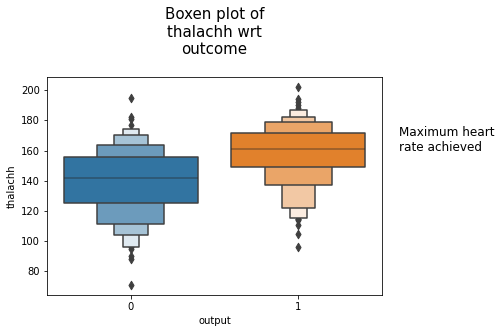

In [37]:
sns.boxenplot(data=df, x='output',y="thalachh")
plt.title("Boxen plot of\nthalachh wrt\noutcome\n",fontsize=15)
plt.text(1.6,160,s="Maximum heart\nrate achieved", fontsize = 12)

Text(2, 60, 'Exercise induced\nangina\n0 - No\n1 - Yes')

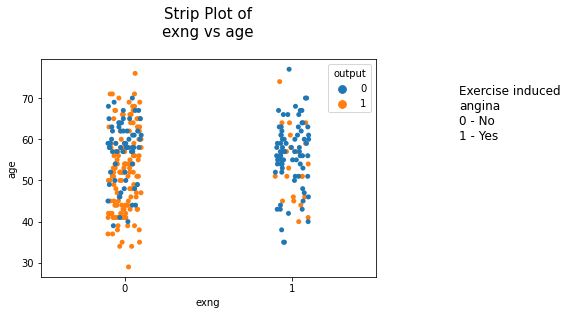

In [38]:
sns.stripplot(data=df, x='exng',y='age',hue='output')
plt.title("Strip Plot of\nexng vs age\n",fontsize=15)
plt.text(2,60,s="Exercise induced\nangina\n0 - No\n1 - Yes", fontsize = 12)

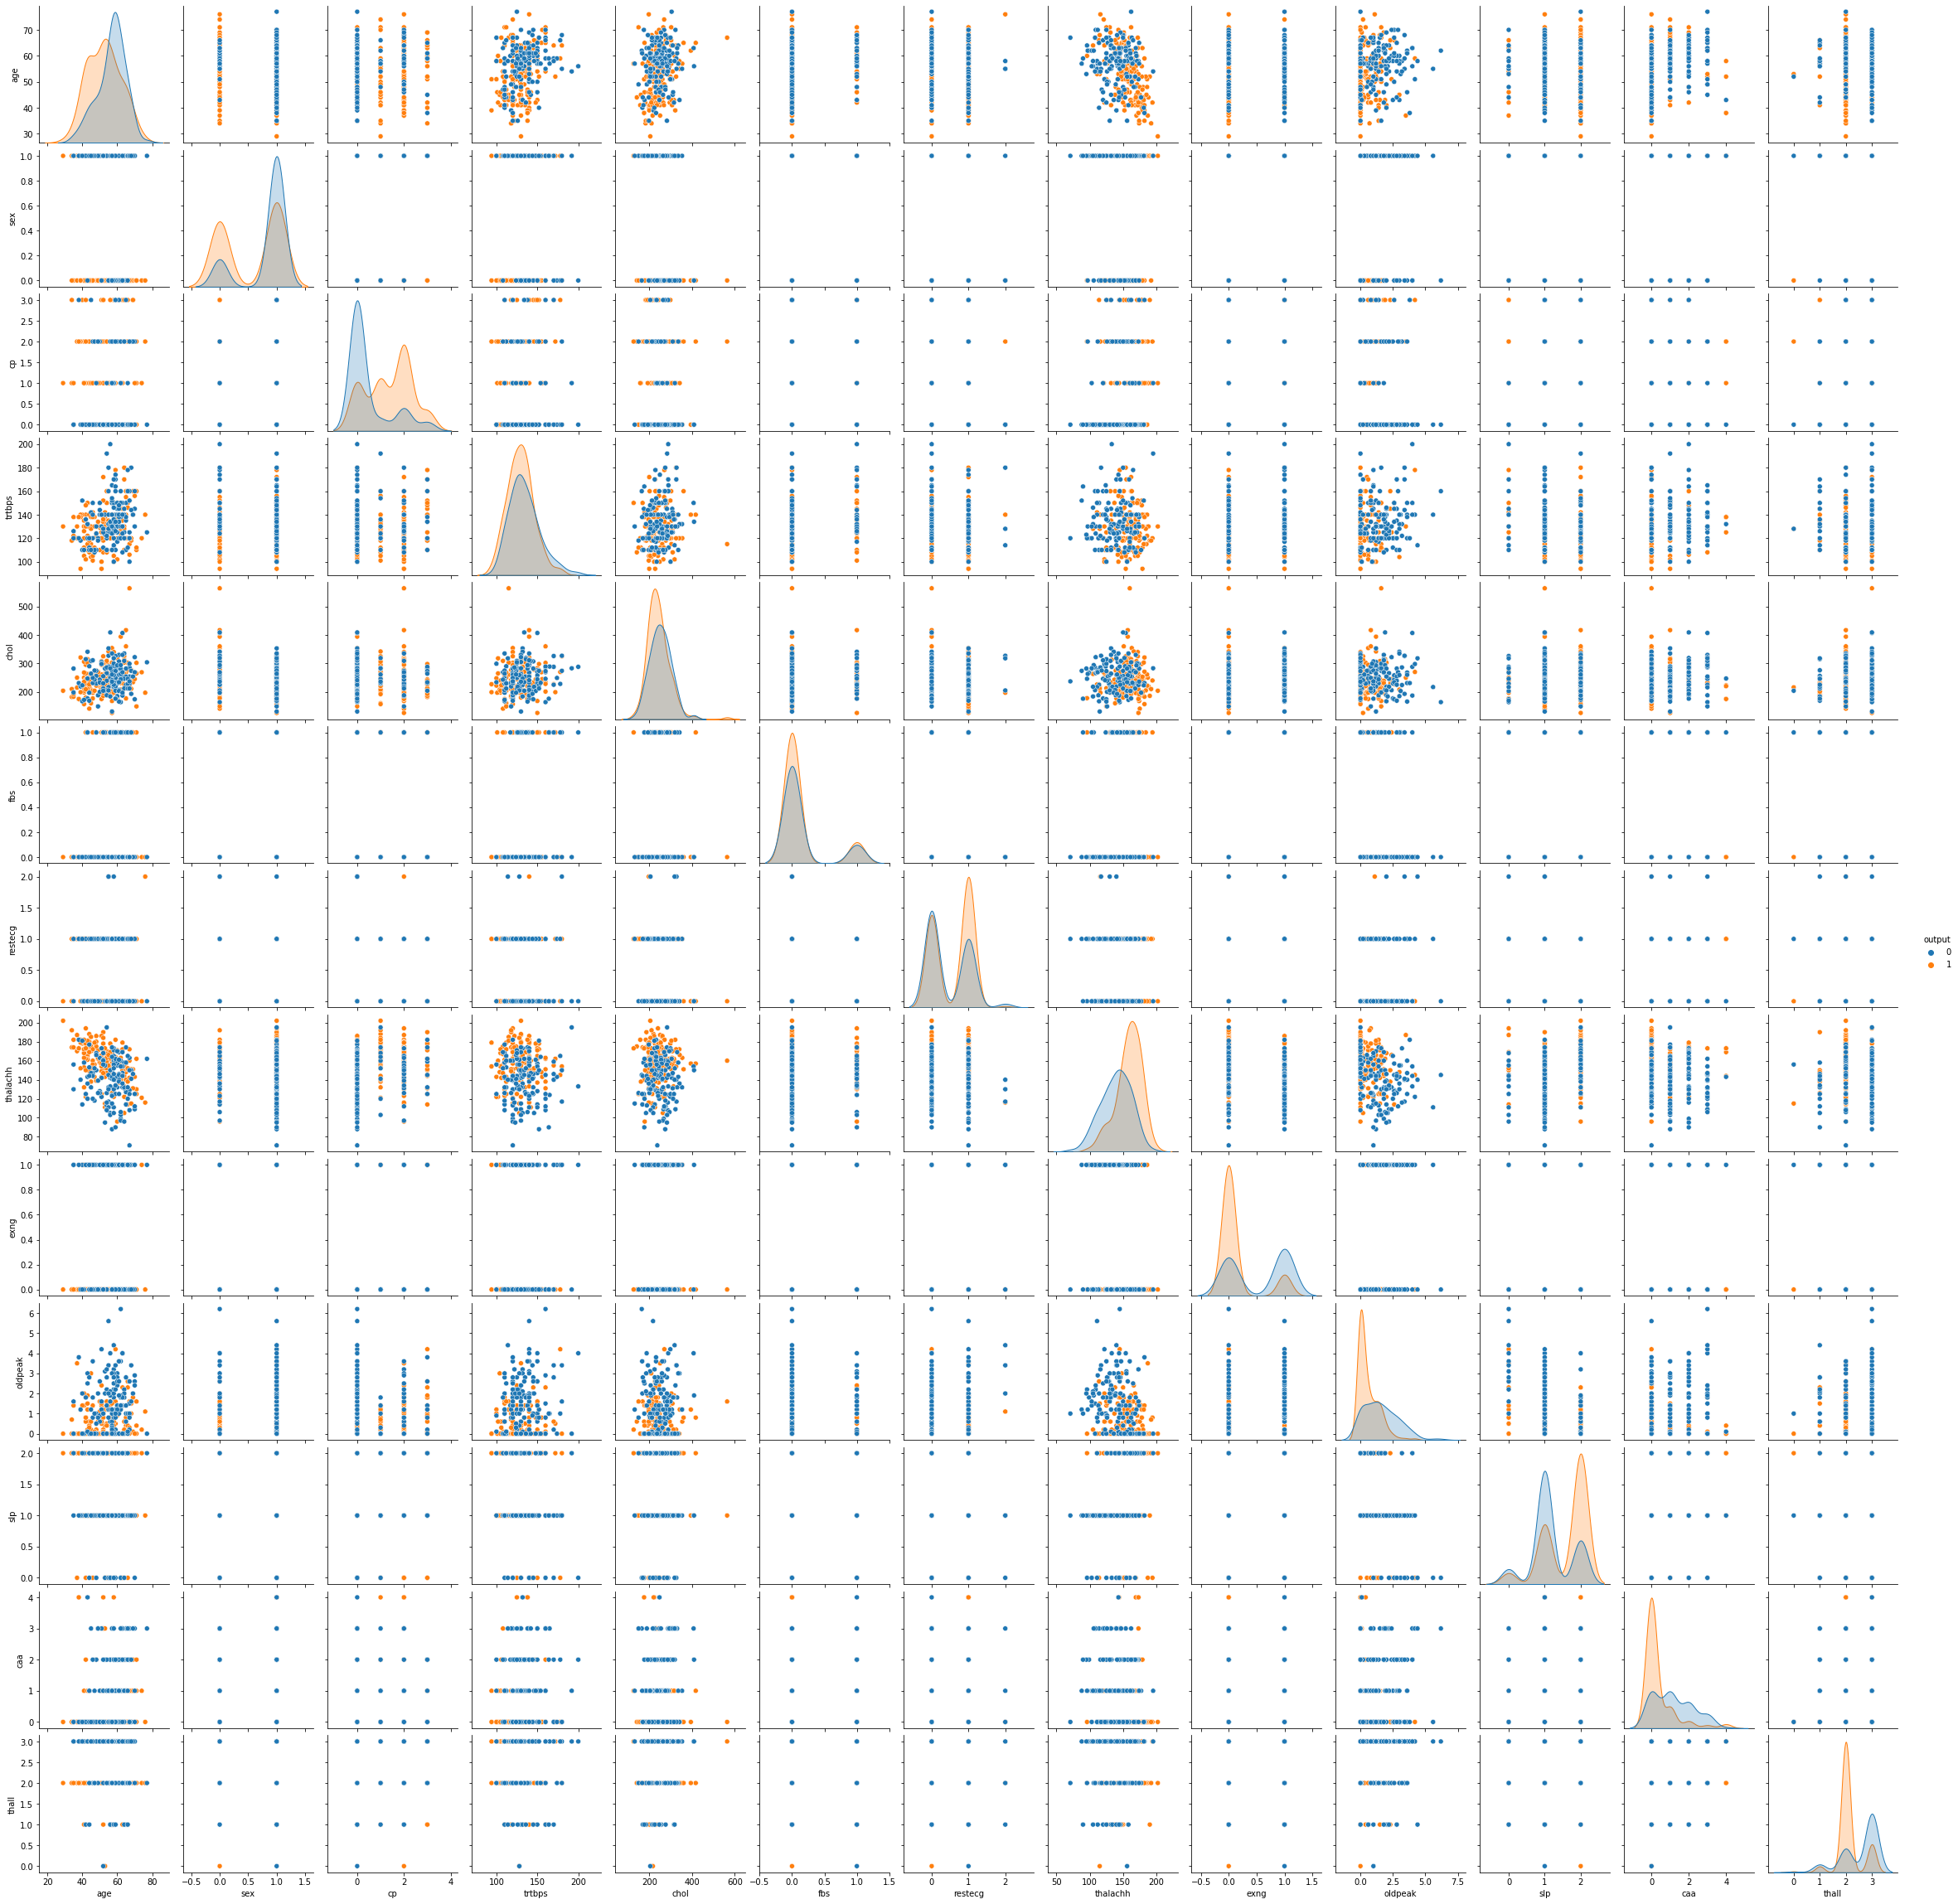

In [39]:
sns.pairplot(df,hue='output')
plt.show()

### Observations


1.   There are no NaN values in the data.
2.   There are certain outliers in all the continuous features.
3. The data consists of more than twice the number of people with sex = 1 than sex = 0.
4. There is no apparent linear correlation between continuous variable according to the heatmap.
5. The scatterplot heatmap matrix suggests that there might be some correlation between output and cp, thalachh and slp.
6. It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age wrt output, it is evident that this isn't the case.
7. According to the distribution plot of thalachh wrt output, people with higher maximum heart rate achieved have higher chances of heart attack.
8. According to the distribution plot of oldpeak wrt output, people with lower pevious peak achieved have higher chances of heart attack.
9. People with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.
10. People with 0 major vessels, that is with caa = 0 have high chance of heart attack.
11. People with sex = 1 have higher chance of heart attack.
12. People with thall = 2 have much higher chance of heart attack.
13. People with no exercise induced angina, that is with exng = 0 have higher chance of heart attack.





# Importing Packages

In [40]:
# importing dependencies

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##### Splitting the Features and Target

In [41]:
X = df.drop(columns='output', axis= 1)
y = df['output']

In [42]:
print(X)

     age  sex  cp  trtbps  chol  fbs  ...  thalachh  exng  oldpeak  slp  caa  thall
0     63    1   3     145   233    1  ...       150     0      2.3    0    0      1
1     37    1   2     130   250    0  ...       187     0      3.5    0    0      2
2     41    0   1     130   204    0  ...       172     0      1.4    2    0      2
3     56    1   1     120   236    0  ...       178     0      0.8    2    0      2
4     57    0   0     120   354    0  ...       163     1      0.6    2    0      2
..   ...  ...  ..     ...   ...  ...  ...       ...   ...      ...  ...  ...    ...
298   57    0   0     140   241    0  ...       123     1      0.2    1    0      3
299   45    1   3     110   264    0  ...       132     0      1.2    1    0      3
300   68    1   0     144   193    1  ...       141     0      3.4    1    2      3
301   57    1   0     130   131    0  ...       115     1      1.2    1    1      3
302   57    0   1     130   236    0  ...       174     0      0.0    1    1

In [43]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64


Splitting the Data into Training Data and Testing Data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, stratify=y, random_state=2)

In [45]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


**Model Training**

**Logistic Regression**

In [46]:
model = LogisticRegression()

In [47]:
# training the logisticregression model with training data
model.fit(X_train, y_train)              #finds the relationship between features and target variable

LogisticRegression()

Model Evaluation

* Accuracy Score

In [48]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [49]:
print("Accuracy on Training data : ", training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [50]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [51]:
print("Accuracy on Test Data : ", test_data_accuracy)

Accuracy on Test Data :  0.819672131147541


**Decision Tree**

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
# model training
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

* Accuracy Score


In [54]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [55]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  1.0


In [56]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [57]:
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.7868852459016393


**Support Vector Machines** **(SVM)**

In [58]:
from sklearn.svm import SVC

In [59]:
# model training
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

* Accuracy Score

In [60]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [61]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.8553719008264463


In [62]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [63]:
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.819672131147541


**Random Forest**

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
# model training
rf = RandomForestClassifier(n_estimators= 10)
rf.fit(X_train, y_train)         # fitting the model

RandomForestClassifier(n_estimators=10)

* Accuracy Score

In [66]:
# accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [67]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.987603305785124


In [68]:
# accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [69]:
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.7540983606557377


**Gradient Boosting Classifier - without tuning**

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
# model training
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)

GradientBoostingClassifier()

* Accuracy Score

In [72]:
# accuracy on training data
X_train_prediction = gbt.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [73]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  1.0


In [74]:
# accuracy on test data
X_test_prediction = gbt.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [75]:
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.7540983606557377


**XGBoost**

In [76]:
from xgboost import XGBClassifier

In [77]:
# model training
xg = XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier()

In [78]:
# accuracy on training data
X_train_prediction = xg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [79]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.987603305785124


In [80]:
# accuracy on test data
X_test_prediction = xg.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [81]:
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.7540983606557377
